In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()
train.shape

(891, 12)

In [4]:
test.shape


(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train['Age']=train['Age'].fillna(train['Age'].median())
test['Age']=test['Age'].fillna(test['Age'].median())

train['Fare']=train['Fare'].fillna(train['Fare'].median())
test['Fare']=test['Fare'].fillna(test['Fare'].median())




In [8]:
train=train.drop(['Cabin','Ticket'],axis=1)
test=test.drop(['Cabin','Ticket'],axis=1)

train=train.dropna()
test=test.dropna()

In [9]:
print(train.shape)
print(test.shape)

(891, 10)
(418, 9)


In [10]:
titles_ignore =['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer','Dona'] 

# Extracting the Titles from Name....
# Step01: Split the Names into Surname and First Name
newnames_train= train["Name"].apply(lambda x:x.split(", ")[-1])
newnames_test= test["Name"].apply(lambda x:x.split(", ")[-1])



# Extracting the Titles from Name....
# Step02: Split the Names into Title and First Name
titles_train = newnames_train.apply(lambda x: x.split(". ")[0])

titles_test = newnames_test.apply(lambda x: x.split(". ")[0])


# titles that are to be kept - Mr, Mrs, Miss, Master & Others
titles_ignore =['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer','Dona'] 

# replacing titles_ignore with Others
titles_train.replace(to_replace=titles_ignore, value="Others", inplace=True)
titles_test.replace(to_replace=titles_ignore, value="Others", inplace=True)


train['Name']=titles_train
test['Name']=titles_test

In [11]:
train['Family']=train['SibSp']+train['Parch']+1
test['Family']=test['SibSp']+test['Parch']+1

In [12]:
train[['Survived','Pclass']]=train[['Survived','Pclass']].astype('str')
test['Pclass']=test['Pclass'].astype('str')



In [13]:
# Size of the Family

def size_family(x):
    if (x==1):
        return('Single')
    elif(x>1) and (x<=4):
        return('Small')
    elif(x>4):
        return('Large')
    
# Applying the Function to the Family Variable:: Train Set
train["Family Size"]=train["Family"].apply(size_family)
test["Family Size"]=test["Family"].apply(size_family)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family Size
0,1,0,3,Mr,male,22.0,1,0,7.2500,S,2,Small
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C,2,Small
2,3,1,3,Miss,female,26.0,0,0,7.9250,S,1,Single
3,4,1,1,Mrs,female,35.0,1,0,53.1000,S,2,Small
4,5,0,3,Mr,male,35.0,0,0,8.0500,S,1,Single


In [15]:
x=train.drop('Survived',axis=1)
y=train['Survived']

x=pd.get_dummies(x)
final_test=pd.get_dummies(test)

#final_test=final_test.drop(['Sex_male','PassengerId'],axis=1)
final_test=final_test.drop(['Sex_male'],axis=1)


from sklearn.model_selection import train_test_split

x=x.drop(['Sex_male','PassengerId'],axis=1)



xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=22)

In [16]:
xtrain1=xtrain[['Age','Fare']]
xtest1=xtest[['Age','Fare']]

In [17]:
xtrain=xtrain.drop(['Age','Fare'],axis=1)
xtest=xtest.drop(['Age','Fare'],axis=1)



In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc.fit(xtrain1)
xtrain1=pd.DataFrame(sc.transform(xtrain1),columns=xtrain1.columns,index=xtrain1.index)
xtest1=pd.DataFrame(sc.transform(xtest1),columns=xtest1.columns,index=xtest1.index)
xtrain1.head()

,Age,Fare
65,-0.083017,-0.338341
319,0.807523,2.095275
746,-0.973557,-0.236220
499,-0.379864,-0.490373
388,-0.083017,-0.491732


In [19]:
xtrain=pd.concat([xtrain,xtrain1],axis=1)
xtest=pd.concat([xtest,xtest1],axis=1)

In [20]:
import xgboost as xgb


In [21]:
xg=xgb.XGBClassifier()

xg.fit(xtrain,ytrain)
pred_xg=xg.predict(xtest)

In [22]:
from sklearn import metrics

In [23]:
print(metrics.classification_report(ytest,pred_xg))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       164
           1       0.77      0.64      0.70       104

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268



In [24]:
a=final_test[['Age','Fare']]

In [25]:
sc.fit(a.values)
a=pd.DataFrame(sc.transform(a.values),columns=a.columns)
a.head()

,Age,Fare
0,0.386231,-0.497413
1,1.371370,-0.512278
2,2.553537,-0.464100
3,-0.204852,-0.482475
4,-0.598908,-0.417492


In [26]:
final_test=final_test.drop(['Age','Fare'],axis=1)

In [27]:
final_test=pd.concat([final_test,a],axis=1)

In [28]:
final_test.head()

,PassengerId,SibSp,Parch,Family,Pclass_1,Pclass_2,Pclass_3,Name_Master,Name_Miss,Name_Mr,...,Name_Others,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Family Size_Large,Family Size_Single,Family Size_Small,Age,Fare
0,892,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0.386231,-0.497413
1,893,1,0,2,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1.371370,-0.512278
2,894,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,2.553537,-0.464100
3,895,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,-0.204852,-0.482475
4,896,1,1,3,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,-0.598908,-0.417492


In [29]:
b=final_test['PassengerId']

final_test=final_test.drop('PassengerId',axis=1)

In [136]:
xgb1 = XGBClassifier(
learning_rate =0.1,
n_estimators=1500,
max_depth=5,
min_child_weight=7,
gamma=0.3,
subsample=0.6,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27)

xgb1.fit(xtrain,ytrain)
pred_xg1=xgb1.predict(final_test)

pred_xg1=pd.DataFrame(pred_xg1,columns=['Survived'])

submission=pd.concat([b,pred_xg1],axis=1)

submission.to_csv('Xgboost4.csv',index=False)

In [31]:
pred_xg1.isnull().sum()

Survived    0
dtype: int64

In [32]:
submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [33]:
submission.shape

(418, 2)

In [34]:
test[test['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family Size
152,1044,3,Mr,male,60.5,0,0,14.4542,S,1,Single


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null object
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
Family         418 non-null int64
Family Size    418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [36]:
pred_xtest1=xg.predict(xtest)

pred_xtest1=pd.DataFrame(pred_xtest1,columns=['Survived'])

#submission=pd.concat([b,pred_xg1],axis=1)

In [37]:
print(metrics.classification_report(ytest,pred_xtest1))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       164
           1       0.77      0.64      0.70       104

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268



In [38]:
metrics.accuracy_score(ytest,pred_xtest1)

0.7873134328358209

## XGboost without tunning accuracy in kaggle i s0.77033

In [39]:
## Now tunning the parameters in xgboost to increase the accuracy

In [40]:
## Tuning the ETA
# Define the Dataset
titanic_dmat = xgb.DMatrix(data = xtrain.values, label=ytrain.values)

# Define the Parameters
params = {"objective":"binary:logistic", "max_depth":3}

# Create a list of ETA Values and an emptry array
eta_vals = [0.0001, 0.001, 0.01, 0.1] # Learning Rate
best_eta = []

for items in eta_vals:
    params["eta"] = items
    cv_results = xgb.cv(params=params, dtrain=titanic_dmat, 
       num_boost_round=5, nfold = 5, metrics="error", as_pandas=True)
    best_eta.append(cv_results["test-error-mean"].tail().values[-1])

# Print the output
print(pd.DataFrame(list(zip(eta_vals, best_eta)), columns=["ETA", "Error"]))

      ETA     Error
0  0.0001  0.163716
1  0.0010  0.163716
2  0.0100  0.163716
3  0.1000  0.163716


In [86]:
train1=pd.concat([xtrain,ytrain],axis=1)
test1=pd.concat([xtest,ytest],axis=1)

In [78]:
xtest.head()

,SibSp,Parch,Family,Pclass_1,Pclass_2,Pclass_3,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Family Size_Large,Family Size_Single,Family Size_Small,Age,Fare
816,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,-0.454076,-0.487736
789,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1.252793,0.966770
869,1,1,3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,-1.864098,-0.422264
235,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,-0.083017,-0.495389
473,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,-0.454076,-0.368015


In [51]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
#from sklearn.metrics import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train =train1
target = 'Survived'
#IDcol = 'ID'



In [87]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Survived'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    dtest_predictions = alg.predict(xtest[predictors])
    dtest_predprob = alg.predict_proba(xtest[predictors])[:,1]
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Survived'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Survived'], dtrain_predprob))
    print ("AUC Score (test): %f" % metrics.roc_auc_score(test1['Survived'], dtest_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8539
AUC Score (Train): 0.921903
AUC Score (test): 0.831789


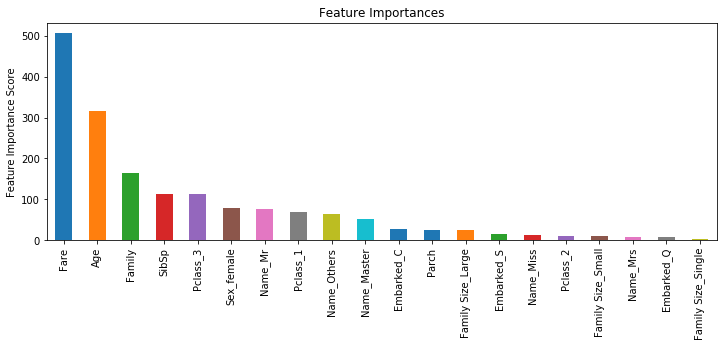

In [120]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
xgb1 = XGBClassifier(
 learning_rate =0.001,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)


In [114]:
param_test1 = {
 'max_depth':range(10,20,1),
 'min_child_weight':range(7,15,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 10, 'min_child_weight': 7}, 0.8812868425900341)

In [96]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.3}, 0.8794153541493968)


Model Report
Accuracy : 0.8539
AUC Score (Train): 0.925025
AUC Score (test): 0.842577


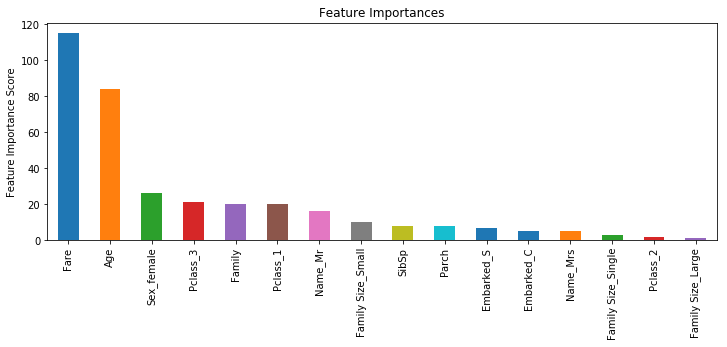

In [135]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1500,
 max_depth=5,
 min_child_weight=7,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [126]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.best_params_, gsearch4.best_score_


({'colsample_bytree': 0.8, 'subsample': 0.6}, 0.882865892972276)

In [127]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1}, 0.8792311411992262)

In [138]:
train1.shape

(623, 21)

In [141]:
train.shape

(623, 21)

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

